In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [25]:
df = pd.read_csv('mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### The data is categorical so I convert it with LabelEncoder to tranfer to ordinal 

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [28]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


### From the taable above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it

In [29]:
df = df.drop(['veil-type'],axis=1)

### Checking for any null value present or not 

In [30]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Is our is balanced?

<AxesSubplot:>

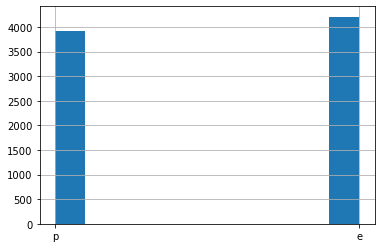

In [7]:
df['class'].hist()

### Checking Correlation

In [49]:
corr_mat = df.corr()

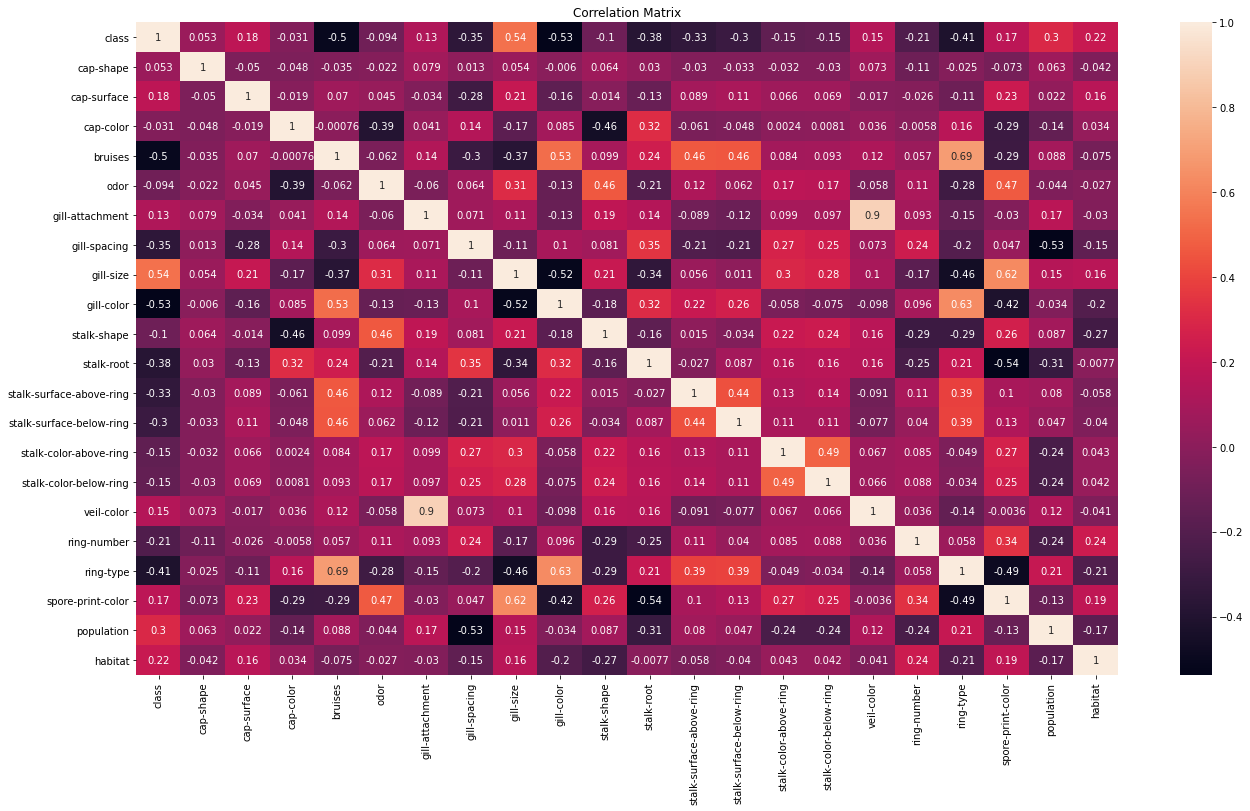

In [50]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

Now we can clearly identify the correlation of independent variable with target variable "Class". As we observe there is a medium coreelation present(no linear relationship).

### Checking for skewness in the data

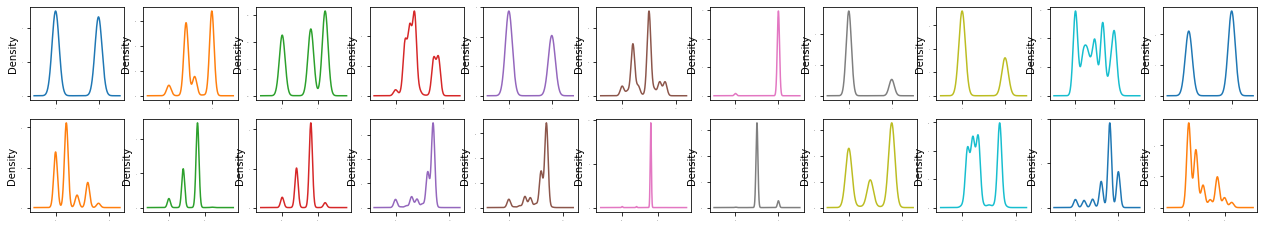

In [52]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(22,12))
plt.show()

As we can see here, there is not skewness present in the data.

In [54]:
x = df.drop('class', axis=1)
y = df['class']

### Finding best random state

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.9578515479298769 on Random State:  167


We have found best random_state value as 167. We will create our train_test_split using random_state(167)

### Creating train test split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=137)

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.9392017903767251
[[1312   55]
 [ 108 1206]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1367
           1       0.96      0.92      0.94      1314

    accuracy                           0.94      2681
   macro avg       0.94      0.94      0.94      2681
weighted avg       0.94      0.94      0.94      2681



In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

1.0
[[1367    0]
 [   0 1314]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1367
           1       1.00      1.00      1.00      1314

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

1.0
[[1367    0]
 [   0 1314]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1367
           1       1.00      1.00      1.00      1314

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [68]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9880641551659829
[[1366    1]
 [  31 1283]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1367
           1       1.00      0.98      0.99      1314

    accuracy                           0.99      2681
   macro avg       0.99      0.99      0.99      2681
weighted avg       0.99      0.99      0.99      2681



We are getting highest accuracy with Decision Tree and Random Forest(100%) but it can be due overfitting also so we will check cross validation scores.

In [69]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean())

Cross Validation score of Logistic Regression:  0.8403339901477832


In [70]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation Scores for Decision Tree: ",scr.mean())

Cross Validation Scores for Decision Tree:  0.9064233421750665


In [71]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation Scores for Random Forest: ",scr.mean())

Cross Validation Scores for Random Forest:  0.8960785145888595


In [72]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation Score for Support Vector Classifier: ",scr.mean())

Cross Validation Score for Support Vector Classifier:  0.8420306934444864


Minimum Difference in accuracy and cross validation score is for DecisionTreeClassifier so this is our best model

### Hyper paramete tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
import numpy as np
parameters = {'max_depth': np.arange(2,15),
             'criterion': ['gini','entropy']}

In [76]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [77]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [78]:
GCV.best_params_ 

{'criterion': 'gini', 'max_depth': 8}

In [79]:
mod = DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=137)

mod.fit(x_train, y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test, pred))

1.0


### Saving the model

In [80]:
import joblib
joblib.dump(mod, 'mushroom_model.pkl')

['mushroom_model.pkl']

### Loading the saved model 

In [82]:
model = joblib.load('mushroom_model.pkl')
prediction = model.predict(x_test)
print(accuracy_score(y_test, prediction)*100)

100.0


In [83]:
prediction = pd.DataFrame(prediction)

In [84]:
prediction.to_csv('result.csv')

In [85]:
prediction

,0
0,1
1,0
2,1
3,1
4,0
...,...
2676,0
2677,1
2678,0
2679,1
